In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import sample, choice
%matplotlib inline
import pesummary
from pesummary.io import read
import h5py

In [2]:
file_name = '/Users/Oscar/Documents/Research/GW190521/GW190521.h5'
# Using pesummary
data = read(file_name)
print('Found run labels:')
print(data.labels)

Found run labels:
['C01:IMRPhenomPv3HM', 'C01:NRSur7dq4', 'C01:SEOBNRv4PHM', 'PrecessingSpinIMRHM', 'PublicationSamples']


In [3]:
samples_dict = data.samples_dict
posterior_samples = samples_dict['C01:NRSur7dq4']

parameters = sorted(list(posterior_samples.keys()))
print(parameters)

['H1_matched_filter_abs_snr', 'H1_matched_filter_snr', 'H1_matched_filter_snr_angle', 'H1_optimal_snr', 'H1_spcal_amp_0', 'H1_spcal_amp_1', 'H1_spcal_amp_2', 'H1_spcal_amp_3', 'H1_spcal_amp_4', 'H1_spcal_amp_5', 'H1_spcal_amp_6', 'H1_spcal_amp_7', 'H1_spcal_amp_8', 'H1_spcal_amp_9', 'H1_spcal_phase_0', 'H1_spcal_phase_1', 'H1_spcal_phase_2', 'H1_spcal_phase_3', 'H1_spcal_phase_4', 'H1_spcal_phase_5', 'H1_spcal_phase_6', 'H1_spcal_phase_7', 'H1_spcal_phase_8', 'H1_spcal_phase_9', 'H1_time', 'L1_matched_filter_abs_snr', 'L1_matched_filter_snr', 'L1_matched_filter_snr_angle', 'L1_optimal_snr', 'L1_spcal_amp_0', 'L1_spcal_amp_1', 'L1_spcal_amp_2', 'L1_spcal_amp_3', 'L1_spcal_amp_4', 'L1_spcal_amp_5', 'L1_spcal_amp_6', 'L1_spcal_amp_7', 'L1_spcal_amp_8', 'L1_spcal_amp_9', 'L1_spcal_phase_0', 'L1_spcal_phase_1', 'L1_spcal_phase_2', 'L1_spcal_phase_3', 'L1_spcal_phase_4', 'L1_spcal_phase_5', 'L1_spcal_phase_6', 'L1_spcal_phase_7', 'L1_spcal_phase_8', 'L1_spcal_phase_9', 'L1_time', 'V1_matched

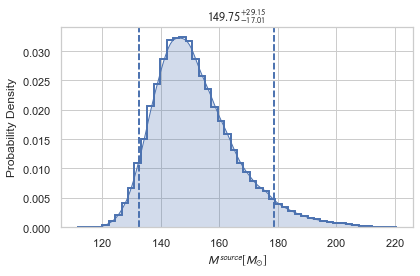

In [4]:
fig = posterior_samples.plot('total_mass_source', type='hist')
line = posterior_samples.plot('total_mass_source', type='hist',fig=fig, kde=True)
plt.show()

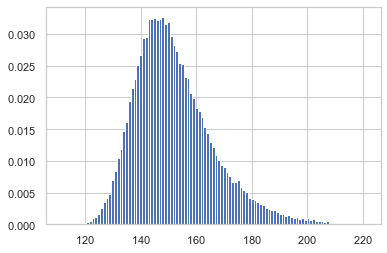

In [5]:
n, bins, _ = plt.hist(posterior_samples['total_mass_source'], bins = 109, density = True)
plt.show()

In [6]:
#define m1 and m2 merger
def Mrem(mass1,mass2):
    M0 = 0.951507
    K2d = 1.995246
    K4f = 2.980990
    MSum3 = mass1 + mass2
    n3 = (mass1 * mass2) / MSum3 
    dm3 = (mass1 - mass2) / MSum3
    
    if mass1 > mass2:
        
        if mass2/mass1 > 1/3:
            Mrem_Mass = ((4*n3) * (4*n3) * ( M0 + K2d*dm3**2 + K4f*dm3**4 ) + (1 + 17 * n3)*dm3**6) / MSum3
        else:
            Mrem_Mass = mass1 + mass2
    else: 
        Mrem_Mass = 0
            
    return Mrem_Mass


# P(Mk / m1i, m2j):
#Function where m1, m2, and Mk are input.
#if m1 and m2 merger result in Mk: 1, else: 0


def PMkBinary(mass1, mass2, Massk, binMass):
    
    Mremnant = (Mrem(mass1, mass2))
        
    if (Mremnant - binMass) <= Massk <= (Mremnant + binMass): 
        Pmkbin = 1
    else: 
        Pmkbin = 0
        
    return Pmkbin

def prob_m(piastro, pmk, pimk):
    prob = piastro * (pmk / pimk)
    return prob
    

In [7]:
#merger data

m1_masses = np.arange(5,200)
m2_masses = np.arange(5,200)

m1_merge = []
m2_merge = [] 
gw_merged = []

gw = np.arange(80,220,1)

for k in gw:
    for i in m1_masses:
        for j in m2_masses:
        
            if PMkBinary(i, j, k, .5) == 1:
                
                m1_merge += [i]
                m2_merge += [j]
                gw_merged += [k]
            

In [8]:
gw_distribution = pd.DataFrame(list(zip(m1_merge, m2_merge, gw_merged)), columns = ['m1', 'm2', 'gw'])

gw_masses = np.trunc(bins[:-1])
gw_dist = n
gw_zip = (list(zip(gw_masses, gw_dist)))
gw_df = pd.DataFrame(gw_zip, columns = ['gw_mass', 'gw_dist'])
gw_df

GW = gw_distribution.merge(gw_df, left_on = 'gw', right_on = 'gw_mass')
GW = GW.drop(columns = ['gw_mass'])
GW

,m1,m2,gw,gw_dist
0,59,58,111,0.000015
1,60,57,111,0.000015
2,61,56,111,0.000015
3,62,55,111,0.000015
4,63,54,111,0.000015
...,...,...,...,...
8822,195,24,219,0.000015
8823,196,23,219,0.000015
8824,197,22,219,0.000015
8825,198,21,219,0.000015


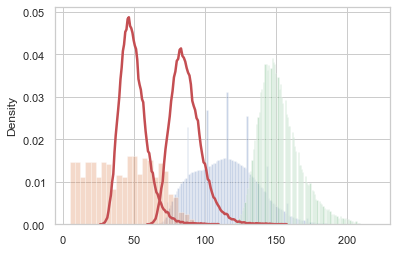

In [18]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m1array[0], element = 'poly', weights = m1array[1], stat = 'density', alpha = 0.3,
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(x = m2array[0], element = 'poly', weights = m1array[1], stat = 'density',alpha = 0.3,
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')




plt.hist(GW['m1'], bins = 130, weights = GW['gw_dist'],alpha = 0.3,density = True )
plt.hist(GW['m2'], bins = 30, weights = GW['gw_dist'] ,alpha = 0.3,density = True)
plt.hist(GW['gw'], bins = 130, weights = GW['gw_dist'] ,alpha = 0.3,density = True)
plt.show()

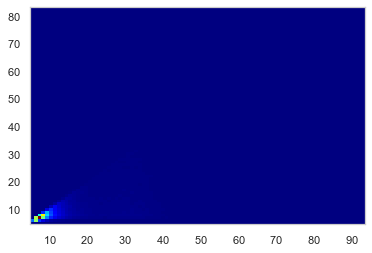

In [19]:
#pi(m1i,m2j)
#Joint Astrophysical Distribution

df1 = pd.read_csv('/Users/Oscar/Documents/Research/GW190521/bbh_pop_samples_z1_more_data_v1.dat', delim_whitespace = True, index_col = None)
m1_powerlaw = df1['#']
m2_powerlaw = df1['m1']
M, xe, ye, img = plt.hist2d(m1_powerlaw, m2_powerlaw, bins = (87,78), cmap = plt.cm.jet, density =True)

ydist = []
sum = 0
for i in np.arange(len(M.T)):
    for j in np.arange(len(M.T[i])):
        sum = sum + (M.T[i,j])
    ydist += [sum]
    sum = 0
    
xdist = []
sum = 0
for i in np.arange(len(M)):
    for j in np.arange(len(M[i])):
        sum = sum + (M[i,j])
    xdist += [sum]
    sum = 0
    
#x bin length
binx = xe[1] - xe[0]
#y bin length
biny = ye[1] - ye[0]

m1_p = np.random.choice(m1_powerlaw,1000)
m2_p = np.random.choice(m2_powerlaw,1000)

In [20]:
PiMk_ = [0, 0, 0, 0, 10, 1602, 26590, 116499, 257636, 358987, 377518, 357822, 325263, 288021, 255447, 222427, 191704, 159710, 130144, 109248, 93558, 80949, 69952, 63429, 61679, 62859, 65442, 71019, 78420, 82142, 84122, 88451, 91929, 89306, 81277, 76343, 79161, 84602, 88042, 85313, 77016, 70348, 66021, 58791, 48875, 40049, 33548, 29239, 25608, 21889, 18239, 15238, 13851, 13437, 13073, 12008, 10601, 9264, 8143, 7268, 7292, 7630, 7489, 7216, 6457, 5769, 4857, 3659, 2825, 2621, 2630, 2623, 2892, 3200, 3094, 3078, 3666, 3681, 3330, 3209, 2812, 2308, 2214, 2576, 3321, 4074, 4053, 3876, 3506, 2658, 1911, 1373, 1099, 917, 798, 667, 547, 513, 472, 409, 350, 332, 285, 237, 209, 169, 135, 96, 88, 90, 62, 35, 25, 21, 14, 13]

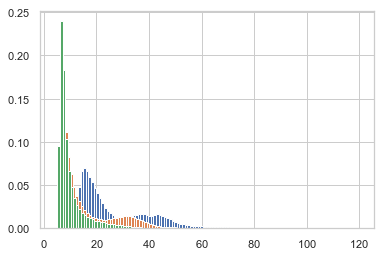

In [21]:
#distribution of PiMk 
Massk = np.arange(5,121,1)
npimk, binspimk, _pimk = plt.hist(Massk, weights = PiMk_, bins = len(PiMk_), density = True)

#ydist of Pi(m1i, m2j)
npiy, binspiy, _piy = plt.hist(xe[:-1], weights = xdist, bins = 87)

#xdist of Pi(m1i, m2j)
npix, binspix, _pix =plt.hist(ye[:-1], weights = ydist, bins = 78)


In [22]:
pimk_masses = np.trunc(binspimk[1:-1])
pimk_dist = npimk[1:]
pimk_zip = (list(zip(pimk_masses, pimk_dist)))
pimk_df = pd.DataFrame(pimk_zip, columns = ['pimk_mass', 'pimk'])

#pi(m1i, m2j)
piastropri_masses = np.trunc(binspiy[1:-1])
piastropri_dist = npiy[1:]
piastropri_zip = (list(zip(piastropri_masses, piastropri_dist)))
piastropri_df = pd.DataFrame(piastropri_zip, columns = ['piastroprimary_mass', 'astroprimary'])

piastrosec_masses = np.trunc(binspix[1:-1])
piastrosec_dist = npix[1:]
piastrosec_zip = (list(zip(piastrosec_masses, piastrosec_dist)))
piastrosec_df = pd.DataFrame(piastrosec_zip, columns = ['piastrosecondary_mass', 'astrosecondary'])

In [23]:
gw_m1 = GW.merge(pimk_df, left_on = 'gw', right_on = 'pimk_mass')
gw_m1 = gw_m1.merge(piastropri_df, left_on = 'm1', right_on = 'piastroprimary_mass')
gw_m1 = gw_m1.drop(columns = ['pimk_mass', 'piastroprimary_mass'])

In [24]:
gw_m2 = GW.merge(pimk_df, left_on = 'gw', right_on = 'pimk_mass')
gw_m2 = gw_m2.merge(piastrosec_df, left_on = 'm2', right_on = 'piastrosecondary_mass')
gw_m2 = gw_m2.drop(columns = ['pimk_mass', 'piastrosecondary_mass'])

In [25]:
probability_m1 = []
for i in range(len(gw_m1['m1'])):
    probability_m1 += [prob_m(gw_m1['astroprimary'][i], 
                          gw_m1['gw_dist'][i], gw_m1['pimk'][i])]
    
probability_m2 = []
for i in range(len(gw_m2['m2'])):
    probability_m2 += [prob_m(gw_m2['astrosecondary'][i], 
                          gw_m2['gw_dist'][i], gw_m2['pimk'][i])]
    
gw_m1['probability'] = probability_m1
gw_m2['probability'] = probability_m2

In [26]:
gw_m1

,m1,m2,gw,gw_dist,pimk,astroprimary,probability
0,59,58,111,0.000015,0.000018,0.000482,0.000413
1,60,57,111,0.000015,0.000018,0.000515,0.000441
2,60,58,112,0.000000,0.000016,0.000515,0.000000
3,60,59,113,0.000000,0.000017,0.000515,0.000000
4,61,56,111,0.000015,0.000018,0.000445,0.000381
...,...,...,...,...,...,...,...
313,91,26,117,0.000061,0.000004,0.000004,0.000064
314,91,34,117,0.000061,0.000004,0.000004,0.000064
315,91,27,118,0.000091,0.000003,0.000004,0.000144
316,91,28,119,0.000151,0.000002,0.000004,0.000258


In [27]:
gw_m2

,m1,m2,gw,gw_dist,pimk,astrosecondary,probability
0,59,58,111,0.000015,0.000018,0.000053,0.000045
1,60,58,112,0.000000,0.000016,0.000053,0.000000
2,61,58,113,0.000000,0.000017,0.000053,0.000000
3,62,58,114,0.000000,0.000011,0.000053,0.000000
4,63,58,115,0.000061,0.000006,0.000053,0.000499
...,...,...,...,...,...,...,...
496,90,29,119,0.000151,0.000002,0.003274,0.207018
497,62,61,117,0.000061,0.000004,0.000057,0.000896
498,63,61,118,0.000091,0.000003,0.000057,0.002016
499,64,61,119,0.000151,0.000002,0.000057,0.003618


In [28]:
#m1 and m2 distributions
import h5py

fn = '/Users/Oscar/Documents/Research/GW190521/GW190521.h5'
data = h5py.File(fn,'r')
waveform = 'C01:NRSur7dq4'
posterior_samples = data[waveform]['posterior_samples']
samples = np.array(posterior_samples).T

mass_1=posterior_samples['mass_1_source']
hist_mass_1=np.histogram(mass_1,bins=100,density=True)
dx=hist_mass_1[1][1]-hist_mass_1[1][0]
m1array = (hist_mass_1[1][:-1]+dx,hist_mass_1[0])

mass_2=posterior_samples['mass_2_source']
hist_mass_2=np.histogram(mass_2,bins=100,density=True)
dx=hist_mass_2[1][1]-hist_mass_2[1][0]
m2array = (hist_mass_2[1][:-1]+dx,hist_mass_2[0])

<AxesSubplot:xlabel='m1', ylabel='Density'>

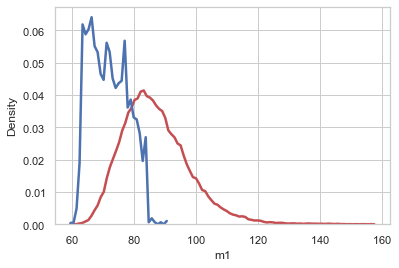

In [29]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m1array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data =gw_m1, x = 'm1', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 33, fill = False, common_norm = False, color = 'C0')

<AxesSubplot:xlabel='m2', ylabel='Density'>

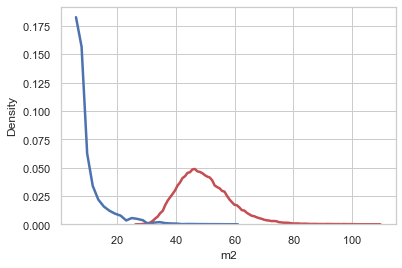

In [30]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m2array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data = gw_m2, x = 'm2', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 30, fill = False, common_norm = False, color = 'C0')




In [31]:
#No Pimk
gw_m1 = GW.merge(piastropri_df, left_on = 'm1', right_on = 'piastroprimary_mass')
gw_m1 = gw_m1.drop(columns = ['piastroprimary_mass'])

gw_m2 = GW.merge(piastrosec_df, left_on = 'm2', right_on = 'piastrosecondary_mass')
gw_m2 = gw_m2.drop(columns = ['piastrosecondary_mass'])

In [32]:
probability_m1 = []
for i in range(len(gw_m1['m1'])):
    probability_m1 += [gw_m1['astroprimary'][i] * gw_m1['gw_dist'][i]]
    
gw_m1['probability'] = probability_m1


probability_m2 = []
for i in range(len(gw_m2['m2'])):
    probability_m2 += [gw_m2['astrosecondary'][i] * gw_m2['gw_dist'][i]]
    
gw_m2['probability'] = probability_m2



<AxesSubplot:xlabel='m1', ylabel='Density'>

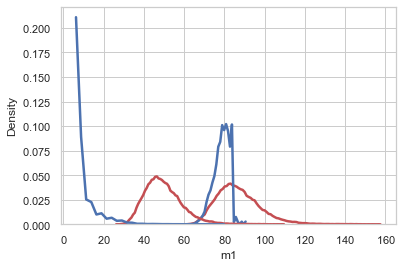

In [34]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m1array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data =gw_m1, x = 'm1', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 33, fill = False, common_norm = False, color = 'C0')

sns.histplot(x = m2array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data = gw_m2, x = 'm2', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 30, fill = False, common_norm = False, color = 'C0')



<AxesSubplot:xlabel='m2', ylabel='Density'>

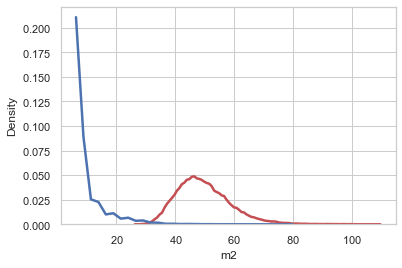

In [113]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m2array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data = gw_m2, x = 'm2', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 30, fill = False, common_norm = False, color = 'C0')





In [114]:
GW

,m1,m2,gw,gw_dist
0,59,58,111,0.000015
1,60,57,111,0.000015
2,61,56,111,0.000015
3,62,55,111,0.000015
4,63,54,111,0.000015
...,...,...,...,...
8587,185,34,219,0.000015
8588,186,33,219,0.000015
8589,187,32,219,0.000015
8590,188,31,219,0.000015


In [167]:
def astrophysical(mass):
    if mass != 0:
        distr = mass**(-2.3)
    else: distr = 0
    return distr

probability_m1 = []
for i in range(len(GW['m1'])):
    probability_m1 += [astrophysical(GW['m1'][i]) * (GW['gw_dist'][i])]

GW['probability'] = probability_m1


probability_m2 = []
for i in range(len(GW['m2'])):
    probability_m2 += [astrophysical(GW['m2'][i]) * (GW['gw_dist'][i])]
    
GW['probability'] = probability_m2




<AxesSubplot:xlabel='m1', ylabel='Density'>

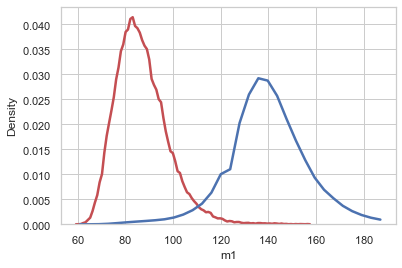

In [168]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m1array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data = GW, x = 'm1', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 33, fill = False,  color = 'C0')



In [35]:
def astrophysical(mass):
    if mass != 0:
        distr = mass**(2.3)
    else: distr = 0
    return distr

probability_m1 = []
for i in range(len(GW['m1'])):
    probability_m1 += [astrophysical(GW['m1'][i]) * (GW['gw_dist'][i])]

GW['probability'] = probability_m1


probability_m2 = []
for i in range(len(GW['m2'])):
    probability_m2 += [astrophysical(GW['m2'][i]) * (GW['gw_dist'][i])]
    
GW['probability'] = probability_m2





<AxesSubplot:xlabel='m1', ylabel='Density'>

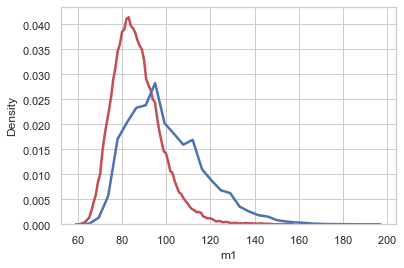

In [36]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m1array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data = GW, x = 'm1', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 33, fill = False,  color = 'C0')




<AxesSubplot:xlabel='m2', ylabel='Density'>

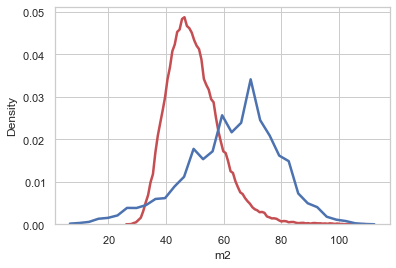

In [37]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m2array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data = GW, x = 'm2', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 33, fill = False,  color = 'C0')





In [212]:
def astrophysical(mass):
    if mass != 0:
        distr = mass**(5)
    else: distr = 0
    return distr

probability_m1 = []
for i in range(len(GW['m1'])):
    probability_m1 += [astrophysical(GW['m1'][i]) * (GW['gw_dist'][i])]

GW['probability'] = probability_m1


probability_m2 = []
for i in range(len(GW['m2'])):
    probability_m2 += [astrophysical(GW['m2'][i]) * (GW['gw_dist'][i])]
    
GW['probability'] = probability_m2






<AxesSubplot:xlabel='m1', ylabel='Density'>

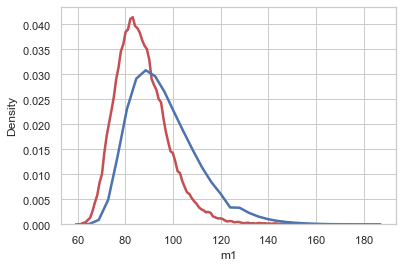

In [213]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

sns.histplot(x = m1array[0], element = 'poly', weights = m1array[1], stat = 'density',
                  linewidth = 2.5, bins = 100, fill = False, common_norm = False, color = 'C3')

sns.histplot(data = GW, x = 'm1', element = 'poly', 
                  weights = 'probability', stat = 'density', linewidth = 2.5,
                 bins = 33, fill = False,  color = 'C0')


